# IMPORTACIONES

In [ ]:
import pandas as pd
import numpy as npç
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir conjunto de entrenamiento


In [ ]:
heart = pd.read_csv('/content/heart.csv')

In [ ]:
x_heart = heart.drop('target', axis = 1)
y_heart = heart['target']
y_heart

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
y_heart

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x_heart,y_heart, random_state=1, test_size=0.25)

# Definir el modelo de red neuronal

In [ ]:
x_train.shape

(227, 13)

In [ ]:
input_sh = x_train.shape[1]

model = keras.Sequential([
        keras.layers.Dense(4, activation = 'relu', input_dim=input_sh),
        keras.layers.Dense(2, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 56        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


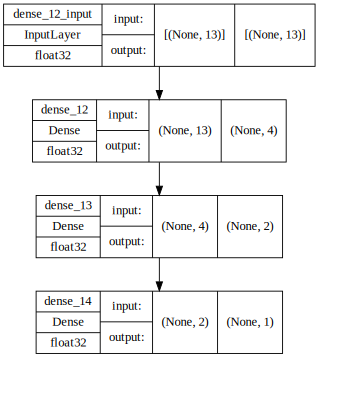

In [ ]:
SVG(model_to_dot(model,show_shapes=True, show_dtype=True, dpi = 65).create(prog = 'dot', format = 'svg'))

# Configurar el proceso de aprendizaje

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['binary_accuracy'] )

# Entrenar el modelo

In [ ]:
model.fit(x_train,y_train, batch_size=10, epochs=15)

Epoch 1/15
23/23 [==============================] - 1s 2ms/step - loss: 1.1758 - binary_accuracy: 0.6079
Epoch 2/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6962 - binary_accuracy: 0.6520
Epoch 3/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6432
Epoch 4/15
23/23 [==============================] - 0s 1ms/step - loss: 0.6642 - binary_accuracy: 0.6388
Epoch 5/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6344
Epoch 6/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6300
Epoch 7/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6300
Epoch 8/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6388
Epoch 9/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6300
Epoch 10/15
23/23 [==============================] - 0s

# Evaluar el modelo

In [ ]:
score = model.evaluate(x_test,y_test, verbose = 0)
print('Test loss:', score [0])
print('Test accuracy:', score [1])

Test loss: 0.6914663910865784
Test accuracy: 0.6184210777282715


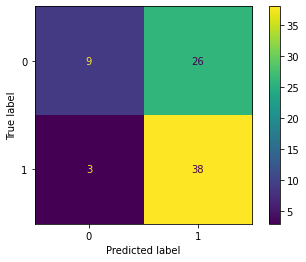

In [ ]:
y_pred = model.predict(x_test).round()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)